In [1]:
# My Google Drive Mount하기!
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# 1. IMDB Example

In [4]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

MaxFeatures = 10000
MaxLen = 100

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=MaxFeatures)

train_input = pad_sequences(train_input, maxlen=MaxLen)
test_input = pad_sequences(test_input, maxlen=MaxLen)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

(25000, 100) (25000,)
(25000, 100) (25000,)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

model.add(Embedding(MaxFeatures, 128, input_length=MaxLen))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 94, 32)            28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 18, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 12, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [8]:
model.compile(
    optimizer=RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['acc']
)

history = model.fit(
    train_input,
    train_target,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
157/157 [==============================] - 33s 23ms/step - loss: 2.9497 - acc: 0.4985 - val_loss: 1.5290 - val_acc: 0.5062
Epoch 2/10
157/157 [==============================] - 3s 21ms/step - loss: 1.2289 - acc: 0.4985 - val_loss: 0.9818 - val_acc: 0.5062
Epoch 3/10
157/157 [==============================] - 3s 21ms/step - loss: 0.8744 - acc: 0.4985 - val_loss: 0.7801 - val_acc: 0.5062
Epoch 4/10
157/157 [==============================] - 3s 22ms/step - loss: 0.7370 - acc: 0.4985 - val_loss: 0.7029 - val_acc: 0.5066
Epoch 5/10
157/157 [==============================] - 3s 21ms/step - loss: 0.6920 - acc: 0.5221 - val_loss: 0.6885 - val_acc: 0.5394
Epoch 6/10
157/157 [==============================] - 3s 22ms/step - loss: 0.6840 - acc: 0.5723 - val_loss: 0.6866 - val_acc: 0.5556
Epoch 7/10
157/157 [==============================] - 4s 23ms/step - loss: 0.6808 - acc: 0.5937 - val_loss: 0.6848 - val_acc: 0.5644
Epoch 8/10
157/157 [==============================] - 4s 22ms/step -

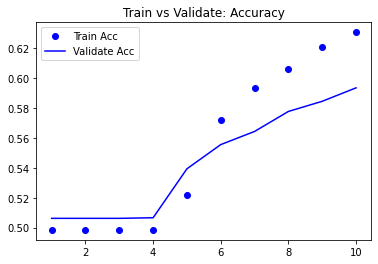

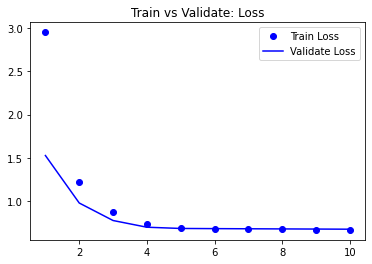

''

In [9]:
import matplotlib.pyplot as plt

train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_list = range(1, len(train_acc) + 1)

plt.plot(epoch_list, train_acc, 'bo', label='Train Acc')
plt.plot(epoch_list, val_acc, 'b', label='Validate Acc')
plt.title('Train vs Validate: Accuracy')
plt.legend()

plt.figure()

plt.plot(epoch_list, train_loss, 'bo', label='Train Loss')
plt.plot(epoch_list, val_loss, 'b', label='Validate Loss')
plt.title('Train vs Validate: Loss')
plt.legend()

plt.show()
;

# 2. 온도 예측 Example

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/03. Kookmin AI Big Data MBA/Semester 3_032021-062021/2. Deep Learning/Jupyter Notebook/data_Week 12/jena_climate_2009_2016.csv')
print(df.shape)

(420551, 15)


In [11]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [12]:
df = df.iloc[:, 1:].values

mean = df[:200000].mean(axis=0)
std = df[:200000].std(axis=0)
df = (df - mean) / std

In [13]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):

    if max_index is None:
        max_index = len(data) - delay - 1
    
    i = min_index + lookback

    while 1:

        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i = i + len(rows)

        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows), ))

        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]

        yield samples, targets

my_lookback = 1440
my_step = 6
my_delay = 144
my_batch_size = 128


train_gen = generator(
    df,
    lookback=my_lookback,
    delay=my_delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=my_step,
    batch_size=my_batch_size
)

val_gen = generator(
    df,
    lookback=my_lookback,
    delay=my_delay,
    min_index=200001,
    max_index=300000,
    step=my_step,
    batch_size=my_batch_size
)

test_gen = generator(
    df,
    lookback=my_lookback,
    delay=my_delay,
    min_index=300001,
    max_index=None,
    step=my_step,
    batch_size=my_batch_size
)

In [14]:
# 전체 Validate Set를 순회하기 위해 val_gen에서 추출할 횟수
val_steps = (300000 - 200001 - my_lookback) // my_batch_size

# 전체 Test Set를 순회하기 위해 test_gen에서 추출할 횟수
test_steps = (len(df) - 300001 - my_lookback) // my_batch_size

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

model.add(Conv1D(32, 5, activation='relu', input_shape=(None, df.shape[-1])))
model.add(MaxPooling1D(3))
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(32, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [16]:
model.compile(
    optimizer=RMSprop(),
    loss='mae',
    metrics=['mse']
)

In [17]:
history = model.fit(
    train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=val_steps
)

Epoch 1/20
500/500 [==============================] - 17s 31ms/step - loss: 0.4193 - mse: 0.2921 - val_loss: 0.4406 - val_mse: 0.3090
Epoch 2/20
500/500 [==============================] - 16s 32ms/step - loss: 0.3628 - mse: 0.2175 - val_loss: 0.4540 - val_mse: 0.3201
Epoch 3/20
500/500 [==============================] - 16s 33ms/step - loss: 0.3415 - mse: 0.1929 - val_loss: 0.4274 - val_mse: 0.2874
Epoch 4/20
500/500 [==============================] - 16s 32ms/step - loss: 0.3261 - mse: 0.1776 - val_loss: 0.4309 - val_mse: 0.2899
Epoch 5/20
500/500 [==============================] - 18s 37ms/step - loss: 0.3135 - mse: 0.1649 - val_loss: 0.4374 - val_mse: 0.3002
Epoch 6/20
500/500 [==============================] - 16s 33ms/step - loss: 0.3050 - mse: 0.1555 - val_loss: 0.4456 - val_mse: 0.3128
Epoch 7/20
500/500 [==============================] - 16s 31ms/step - loss: 0.2962 - mse: 0.1475 - val_loss: 0.4536 - val_mse: 0.3261
Epoch 8/20
500/500 [==============================] - 16s 31ms

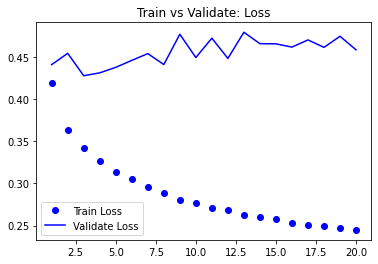

''

In [18]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_list= range(1, len(train_loss) + 1)

plt.figure()

plt.plot(epoch_list, train_loss, 'bo', label='Train Loss')
plt.plot(epoch_list, val_loss, 'b', label='Validate Loss')
plt.title('Train vs Validate: Loss')
plt.legend()

plt.show()
;

In [ ]:
# Conv1D: Text에는 좋은 성능을 보이지만, Time Series에서는 좋지 않은 성능을 보임!

# 3. CNN과 RNN의 결합: Time Series에 좋은 성능을 보일 수 있도록 하기 위함!

In [20]:
STEP = 3

from tensorflow.keras.layers import GRU

model = Sequential()

model.add(Conv1D(32, 5, activation='relu', input_shape=(None, df.shape[-1])))
model.add(MaxPooling1D(3))
model.add(Conv1D(32, 5, activation='relu'))
model.add(GRU(32, dropout=0.1))
model.add(Dense(1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 13,793
Trainable params: 13,793
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(
    optimizer=RMSprop(),
    loss='mae',
    metrics=['mse']
)

In [22]:
history = model.fit(
    train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=val_steps
)

Epoch 1/20
500/500 [==============================] - 23s 41ms/step - loss: 0.3400 - mse: 0.1903 - val_loss: 0.2928 - val_mse: 0.1418
Epoch 2/20
500/500 [==============================] - 20s 40ms/step - loss: 0.3044 - mse: 0.1537 - val_loss: 0.2840 - val_mse: 0.1337
Epoch 3/20
500/500 [==============================] - 20s 39ms/step - loss: 0.2878 - mse: 0.1383 - val_loss: 0.2885 - val_mse: 0.1382
Epoch 4/20
500/500 [==============================] - 20s 40ms/step - loss: 0.2729 - mse: 0.1256 - val_loss: 0.2845 - val_mse: 0.1352
Epoch 5/20
500/500 [==============================] - 20s 40ms/step - loss: 0.2609 - mse: 0.1153 - val_loss: 0.3002 - val_mse: 0.1502
Epoch 6/20
500/500 [==============================] - 21s 42ms/step - loss: 0.2499 - mse: 0.1069 - val_loss: 0.2972 - val_mse: 0.1471
Epoch 7/20
500/500 [==============================] - 20s 40ms/step - loss: 0.2395 - mse: 0.0990 - val_loss: 0.3030 - val_mse: 0.1500
Epoch 8/20
500/500 [==============================] - 20s 40ms

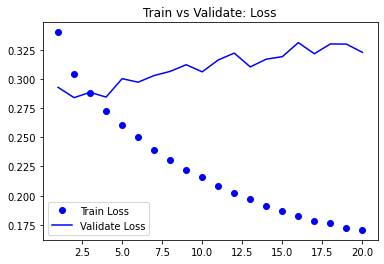

''

In [23]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_list= range(1, len(train_loss) + 1)

plt.figure()

plt.plot(epoch_list, train_loss, 'bo', label='Train Loss')
plt.plot(epoch_list, val_loss, 'b', label='Validate Loss')
plt.title('Train vs Validate: Loss')
plt.legend()

plt.show()
;